In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## <step1. 탐색> : 츠로야구 연봉 데이터 살펴보기
### [프로야구 연봉 데이터 셋의 기본 정보]

In [114]:
picher_file_path = './dataset/data/picher_stats_2017.csv'
batter_file_path =  './dataset/data/batter_stats_2017.csv'

picher = pd.read_csv(pichaer_file_path)
batter_file_path = pd.read_csv(batter_file_path)

In [115]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [116]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [117]:
print(picher.shape)

(152, 22)


### [참고 - 한글을 사용하는 그래프]

- 파이썬에서 matplotlib 기반의 시각화 툴을 이용할 때 한글 폰트를 사용하는 방법
    - 자신의 개발환경에 설치된 폰트 확인
        - `set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))`
    - 한글 폰트를 설정한 뒤, 축에 적용
        - 예시 :`mpl.rc('font', family='08SeoulHangang')`
    - 한글 폰트가 없다면, http://hangeul.naver.com/2017/nanum 에서 설치

In [118]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) # 현재 OS 내에 설치된 폰트를 확인합니다.

{'AlternateGothic2 BT',
 'Ami R',
 'Arial',
 'Batang',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Calibri',
 'Cambria',
 'Candara',
 'Century',
 'Century Gothic',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Corbel',
 'Courier New',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Ebrima',
 'Franklin Gothic Medium',
 'Freestyle Script',
 'French Script MT',
 'Gabriola',
 'Gadugi',
 'Garamond',
 'Georgia',
 'Gulim',
 'HCR Batang',
 'HCR Batang Ext',
 'HCR Batang ExtB',
 'HCR Dotum',
 'HCR Dotum Ext',
 'HYGothic-Extra',
 'HYGothic-Medium',
 'HYGraphic-Medium',
 'HYGungSo-Bold',
 'HYHeadLine-Medium',
 'HYMyeongJo-Extra',
 'HYPMokGak-Bold',
 'HYPost-Light',
 'HYPost-Medium',
 'HYShortSamul-Medium',
 'HYSinMyeongJo-Medium',
 'Haan Wing2',
 'Hancom Gothic',
 'HancomEQN',
 'Headline R',
 'HyhwpEQ',
 'Impact',
 'Javanese Text',
 'Juice ITC',
 'Kristen ITC',
 'LG PC',
 'Leelawadee',
 'Leelawadee

In [161]:
mpl.rc('font', family='Gulim') # 자신의 OS에 존재하는 한글 폰트를 선택합니다. 없는경우, 위의 링크에서 한글폰트 설치 후 실행합니다.

**예측할 대상인 연봉에 대한 정보**

In [120]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

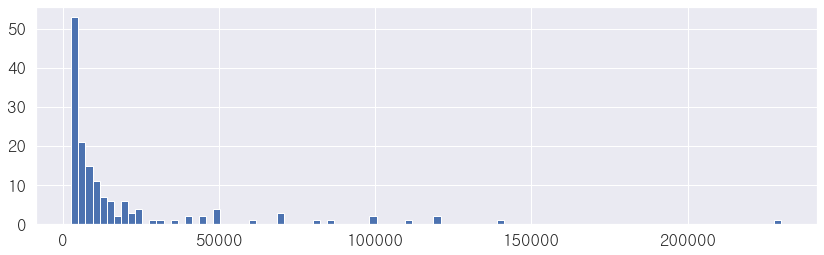

In [121]:
picher['연봉(2018)'].hist(bins=100) # 2018년 연봉 분포를 출력합니다.

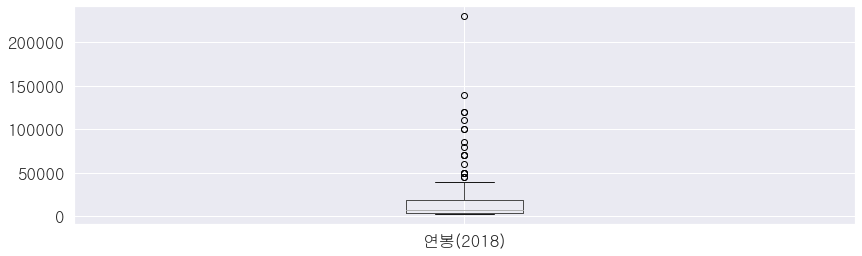

In [122]:
# 연봉의 boxplot을 출력
picher.boxplot(column=['연봉(2018)'])

### [회귀 분석에 사용할 피처 살펴보기]

In [123]:
pichaer_features_df = picher[['승','패','세','홀드','블론','경기','선발','이닝','삼진/9',
                              '볼넷/9','홈런/9','BABIP','LOB%','ERA','RA9-WAR','FIP','kFIP','WAR',
                              '연봉(2018)','연봉(2017)']]

In [124]:
# 피처 각각에 대한 histogram을 출력합니다. 
def plot_hist_each_colum(df):
    plt.rcParams['figure.figsize']=[20,16]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다. 
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

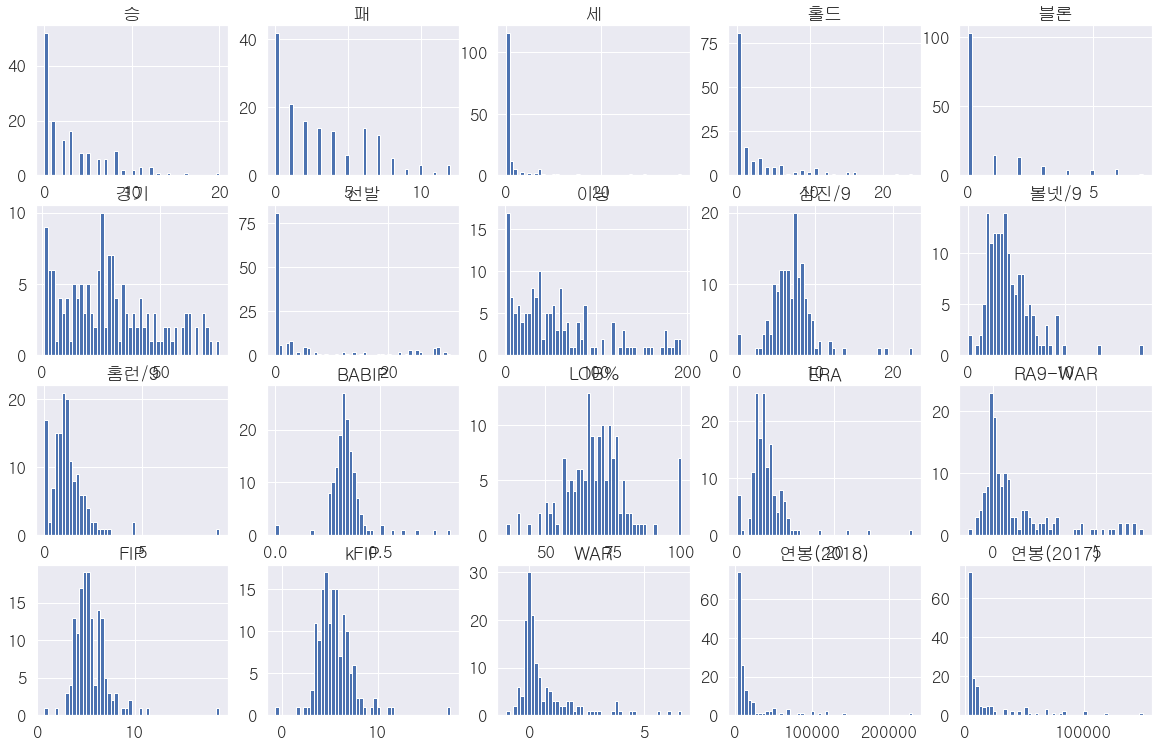

In [125]:
plot_hist_each_colum(pichaer_features_df)

## <step2. 예측> : 투수의 연봉 예측하기
### [피처들의 단위 맞춰주기: 피처 스케일링]

In [126]:
# pandas 형태로 정의된 데이터를 출력할 떄, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [127]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다. 
def standard_scaling(df, scale_columns):
    for col in scale_columns:        
        series_mean = df[col].mean()
        seried_std = df[col].std()
        df[col]  = df[col].apply(lambda x: (x-series_mean)/seried_std)

    return df

In [128]:
# 피처 각각에 대한 scaling을 수행합니다. 
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']

picher_df = standard_scaling(picher, scale_columns)

In [129]:
picher_df = picher_df.rename(columns={'연봉(2018)':'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


### [피처들의 단위 맞춰주기 : one-hot-encoding]

In [130]:
# 팀명 피처를 one_hot encoding으로 변환합니다. 
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)

In [131]:
team_encoding.head()

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [132]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


### [회귀 분석 적용하기]
**회귀 분석을 위한 학습, 테스트 데이터셋 분리**

In [133]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_text, y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=19)

**회귀 분석 계수 학습 & 학습된 계수 출력**

In [134]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [135]:
print(lr.coef_)

[ -1266.90441102   -617.19799977 -58396.27201924  -1354.97315468
   1374.62844181   -867.27161193  -1165.46911869   -808.55554673
   3400.24636505    805.014877     9834.41859821  48672.71400956
  -3039.9547505    -962.22416776   1040.4446927    5197.78969311
   1096.12794797  -2262.59515577   3556.74935989  -8098.02940668
   -384.28585451   -273.52765183  19382.94925002   4678.89522621
   1850.15588497   3035.53162537  -1314.52818124  11197.87253342]


In [136]:
picher_df.columns

Index(['선수명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'y',
       '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

## <step3. 평가> : 예측 모델 평가하기

### [어떤 피처가 가장 영향력이 강한 피처일까]

In [137]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀분석을 수행합니다. 

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     50.14
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           3.50e-49
Time:                        13:22:30   Log-Likelihood:                -1397.4
No. Observations:                 136   AIC:                             2851.
Df Residuals:                     108   BIC:                             2932.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.674e+04    623.193     26.857      0.000    1.55e+04     1.8e+04
BABIP      -1266.9044   1187.339     -1.067      0.288   -3620.415    1086.607
ERA         -617.1980   2176.990     -0.284      0.777   -4932.371    3697.975
FIP         -5.84e+04   7.99e+04     -0.731      0.466   -2.17e+05    9.99e+04
KIA          504.7101   2077.674      0.243      0.809   -3613.600    4623.021
KT          3234.3117   1975.579      1.637      0.105    -681.628    7150.252
LG           992.4116   2117.713      0.469      0.640   -3205.262    5190.086
LOB%       -1165.4691   1398.439     -0.833      0.406   -3937.419    1606.481
NC          1051.1277   2375.501      0.442      0.659   -3657.528    5759.784
RA9-WAR     3400.2464   2557.914      1.329      0.187   -1669.983    8470.476
SK          2664.6981   1924.670      1.384      0.169   -1150.331    6479.727
WAR         9834.4186   2234.274      4.402      0.000    5405.699    1.43e+04
kFIP        4.867e+04   6.79e+04      0.717      0.475   -8.59e+04    1.83e+05
경기         -3039.9548   2592.724     -1.172      0.244   -8179.183    2099.273
두산           897.4591   2432.726      0.369      0.713   -3924.626    5719.544
롯데          2900.1279   2338.829      1.240      0.218   -1735.838    7536.094
볼넷/9        5197.7897   5091.244      1.021      0.310   -4893.939    1.53e+04
블론          1096.1279   1144.883      0.957      0.340   -1173.229    3365.485
삼성          -402.9119   1967.875     -0.205      0.838   -4303.582    3497.758
삼진/9        3556.7494   6414.096      0.555      0.580   -9157.101    1.63e+04
선발         -8098.0294   4464.685     -1.814      0.072   -1.69e+04     751.750
세           -384.2859   1171.832     -0.328      0.744   -2707.061    1938.489
승           -273.5277   1969.177     -0.139      0.890   -4176.777    3629.722
연봉(2017)    1.938e+04   1155.607     16.773      0.000    1.71e+04    2.17e+04
이닝          4678.8952   5566.103      0.841      0.402   -6354.087    1.57e+04
패           1850.1559   1674.916      1.105      0.272   -1469.817    5170.129
한화          4895.2149   1915.337      2.556      0.012    1098.684    8691.746
홀드         -1314.5282   1395.478     -0.942      0.348   -4080.608    1451.552
홈런/9         1.12e+04   1.37e+04      0.815      0.417    -1.6e+04    3.84e+04
==============================================================================
Omnibus:                       35.525   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.136
Skew:                          -0.427   Prob(JB):                     2.08e-77
Kurtosis:                      10.848   Cond. No.                     3.38e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

[Text(0, 0, 'const'),
 Text(0, 0, 'BABIP'),
 Text(0, 0, 'ERA'),
 Text(0, 0, 'FIP'),
 Text(0, 0, 'KIA'),
 Text(0, 0, 'KT'),
 Text(0, 0, 'LG'),
 Text(0, 0, 'LOB%'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'RA9-WAR'),
 Text(0, 0, 'SK'),
 Text(0, 0, 'WAR'),
 Text(0, 0, 'kFIP'),
 Text(0, 0, '경기'),
 Text(0, 0, '두산'),
 Text(0, 0, '롯데'),
 Text(0, 0, '볼넷/9'),
 Text(0, 0, '블론'),
 Text(0, 0, '삼성'),
 Text(0, 0, '삼진/9'),
 Text(0, 0, '선발'),
 Text(0, 0, '세'),
 Text(0, 0, '승'),
 Text(0, 0, '연봉(2017)'),
 Text(0, 0, '이닝'),
 Text(0, 0, '패'),
 Text(0, 0, '한화'),
 Text(0, 0, '홀드'),
 Text(0, 0, '홈런/9')]

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


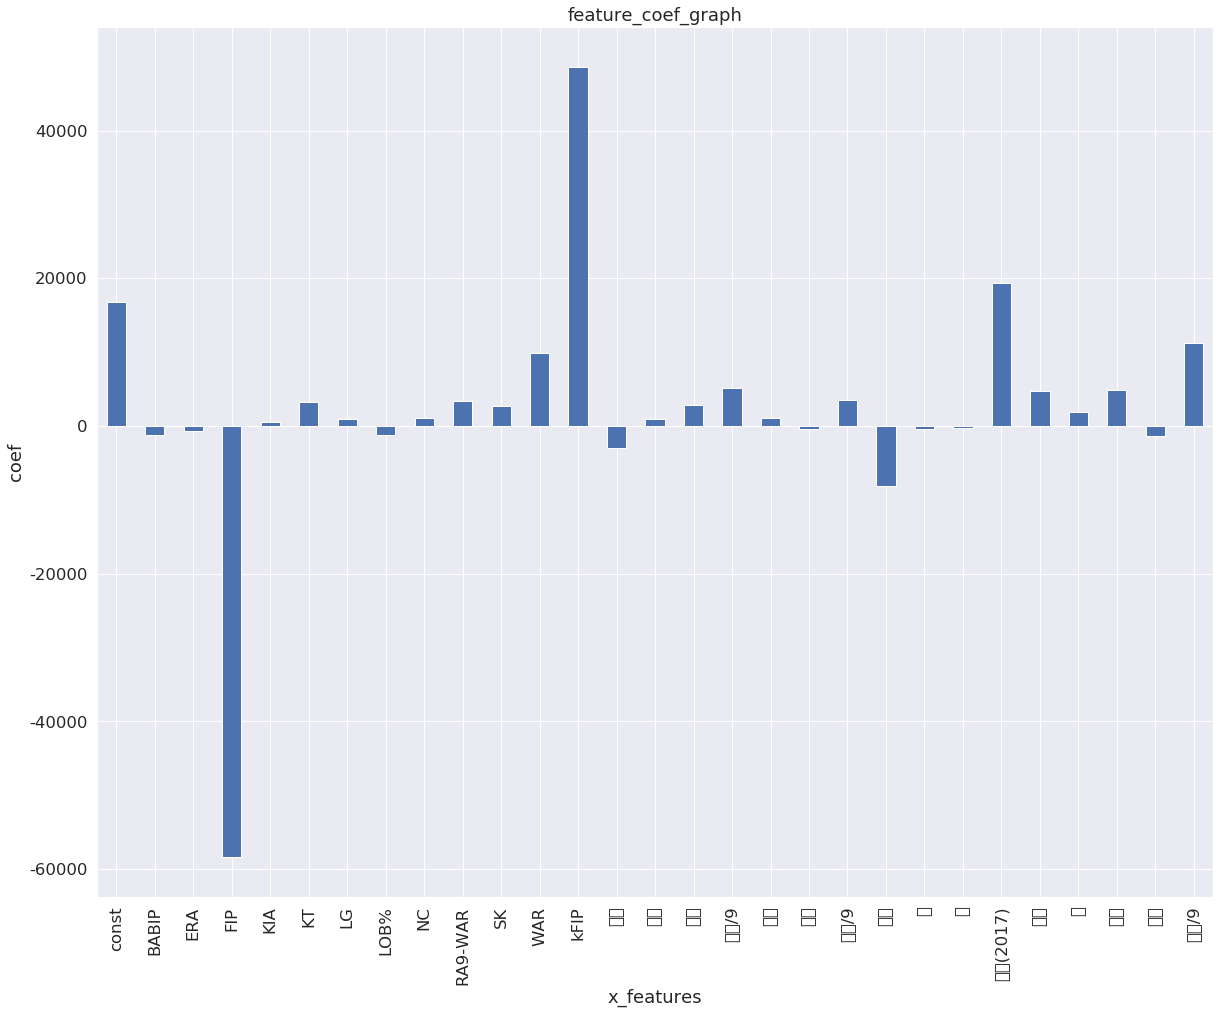

In [138]:
# 한글 출력을 위한 사전 설정 답계입니다. 
mpl.rc('font',family='AppleGothic')
plt.rcParams['figure.figsize']=[20,16]

#회귀 계수를 리스트로 반환합니다. 
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환합니다. 
x_labels = model.params.index.tolist()

# 회귀 계수를 출력합니다. 
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

### [예측 모델의 평가]

In [139]:
# 학습 데이터와 테스트 데이터로 분리합니다. 
X= picher_df[picher_df.columns.difference(['선수명','y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=19)

# 회귀 분석 모델을 학습합니다.

In [140]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

**R2 score**

In [141]:
# 회귀 분석 모델을 평가합니다. 
print(model.score(X_train, y_train)) # train R2 score를 출력합니다. 
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9276949405576705
0.8860171644977815


** RMSE score**

In [142]:
# 회귀 분석 모델을 평가합니다. 
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다. 
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다

7282.7186847463745
14310.696436889151


### [피처들의 상관관계 분석]

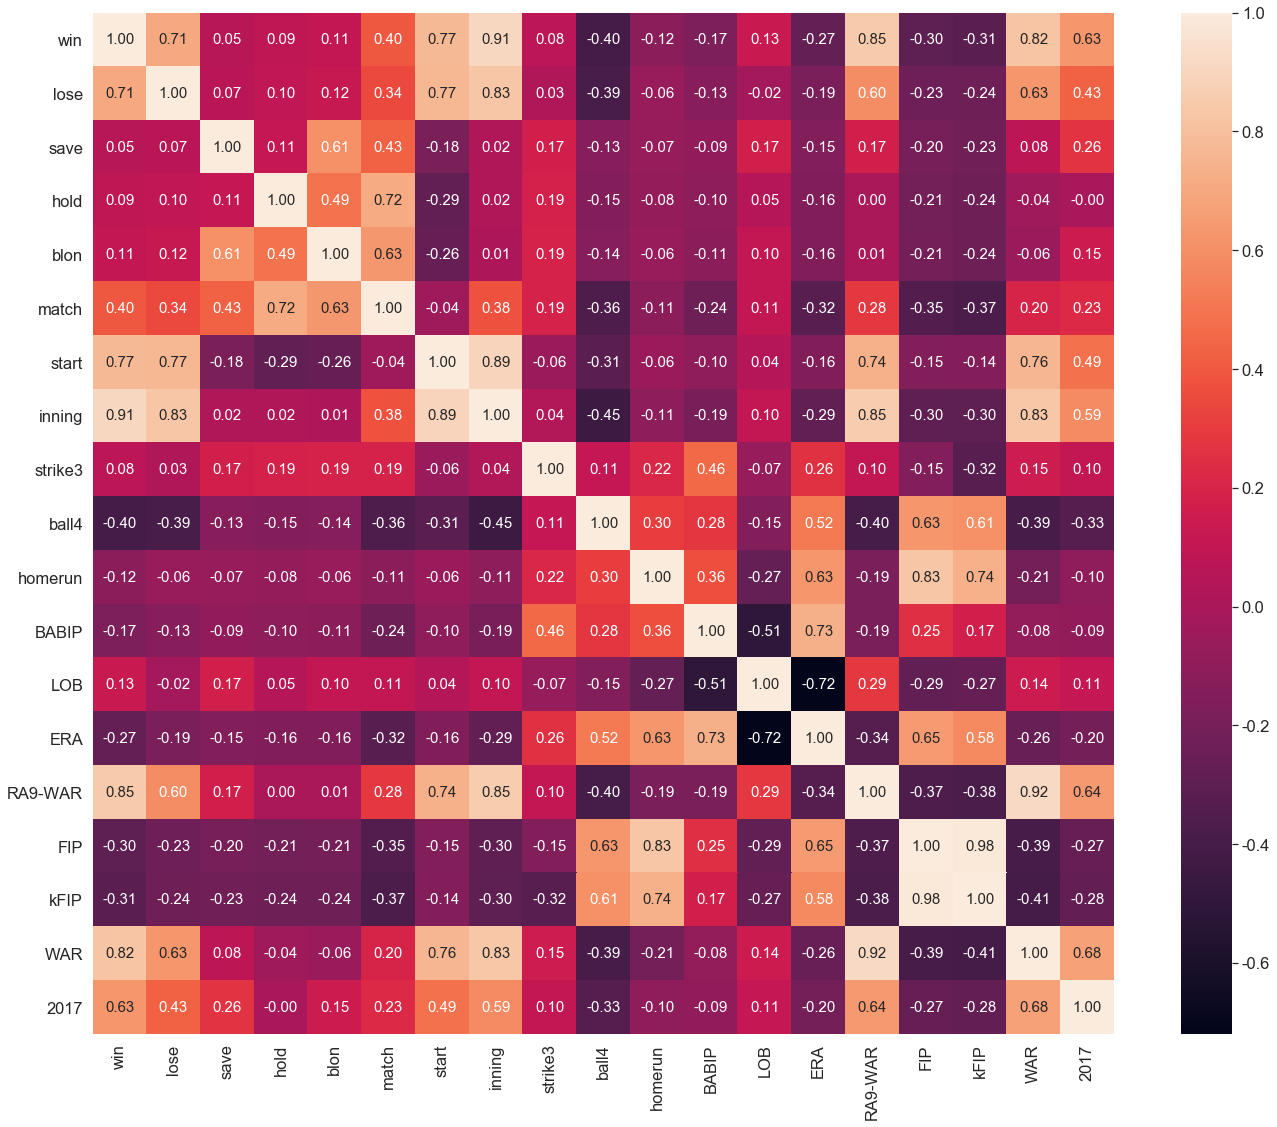

In [143]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산합니다. 
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화 합니다. 
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values, 
                cbar=True,
                annot = True,
                square =True, 
                fmt = '.2f',
                annot_kws = {'size':15},
                yticklabels=show_cols,
                xticklabels=show_cols)

plt.tight_layout()
plt.show()

### `[미니 퀴즈 - 3.1]`
- `Train score, 그리고 Test score의 차이점은 무엇일까요? 그리고 어떤 점수가 더 높아야 할까요?` 
    - 훈련 데이터셋을 통해 계산한 점수와 테스트 데이터셋을 통해 계산한 점수간에는 어떤 차이가 있는 것인지 적어 봅시다. 그리고 이 두 점수의 차이가 크다면, 어떤 상황을 의미하는 것인지 생각해 봅시다.
        - `대답 예시` : 훈련 데이터셋은 오로지 모델을 학습하고, 비용함수(오차함수)를 평가하는데 사용됩니다. 반면, 테스트 데이터셋은 모델에 영향을 미치지 않습니다. 결과를 예측하기 위한 입력데이터로만 활용됩니다. 가장 이상적인 경우는 Train score, Test score가 차이가 없는 것입니다. 이 차이가 벌어질수록 모델이 훈련 데이터셋에 과적합된 것입니다. 일반적으로는 Train score가 약간 더 높습니다.

### [회귀 분석 예측 성능을 높이기 위한 방법 : 다중공선성 확인]

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


### `[미니 퀴즈 - 3.2]`
- `적절한 피처를 선정하여 다시 학습해 보세요.` 
    - 사용할 피처를 다시 고른 뒤, 다시 학습을 진행했을 때의 Train score, Test score가 어떻게 향상되는지 살펴봅니다.
        - 저자의 경우 아래의 과정을 거쳐 ['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)'] 피처를 선정했을 때, 더욱 좋은 결과를 나타냈습니다.
            - 선정 과정
                - 1. VIF 계수가 높은 피처들을 우선적으로 제거합니다. 단, (FIP, kFIP)와 같이 유사한 두가지 피처중에는 하나만을 제거합니다.
                - 2. 다시 공선성을 검증합니다. 이전 단계에서는 VIF 계수가 높았던 볼넷, 삼진 등의 피처의 VIF 계수가 낮아진 것을 확인할 수 있습니다. VIF 계수가 비정상적으로 높은 피처를 제거해주면, 다른 피처들의 공선성도 자연스레 감소하기 때문입니다.
                - 3. 여전히 VIF 계수가 높은 피처들을 제거합니다.
                - 4. 남은 피처를 토대로 다시한번 회귀분석을 실시합니다. 분석 결과에서 p-value가 유의하면서도 영향력이 큰 피처들을 선정합니다.
            - train_score, test_score를 비교했을 때, 기존보다 overfit이 비교적 덜 된것으로 보입니다
            - test rmse 역시 감소한 것을 볼 수 있습니다.

### [적절한 피처로 닷 학습하기]

In [146]:
# 피처로 재선정합니다. 
X = picher_df[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']]
y = picher_df['y']
X_train,X_test, y_train, y_test  =train_test_split(X,y,test_size=0.2, random_state=19)

In [147]:
# 모델을 학습합니다. 
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [148]:
# 결과를 출력합니다. 
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score 를 출력합니다

0.9150591192570362
0.9038759653889866


In [149]:
# 회귀 분석 모델을 평가합니다. 
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) #train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7893.462873347693
13141.866063591076


In [150]:
# 피처마다의 VIF 계수를 출력합니다. 
X = picher_df[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']]
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


## <step4. 시각화> : 분석 결과의 시각화
### [예상 연봉과 실제 연봉 비교]
**한글깨짐 참고 : http://corazzon.github.io/matplotlib_font_setting**

In [164]:
#한글 폰트 사용
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt
 
#폰트 경로
font_path = "C:/Windows/Fonts/LG PC.ttf"
 
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
 
#font 설정
matplotlib.rc('font',family=font_name)
 

In [165]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.1.3
설치 위치:  D:\anaconda\envs\chch4934\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\kiminae\.matplotlib
캐시 위치:  C:\Users\kiminae\.matplotlib


In [166]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  D:\anaconda\envs\chch4934\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [167]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
18.0
# 설정 되어있는 폰트 글꼴
['LG PC']


In [168]:
# 2018년 연봉을 예측하여 데이터프레임의 column으로 생성합니다. 
X = picher_df[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [169]:
# 원래의 데이터 프레임을 다시 로드합니다.
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


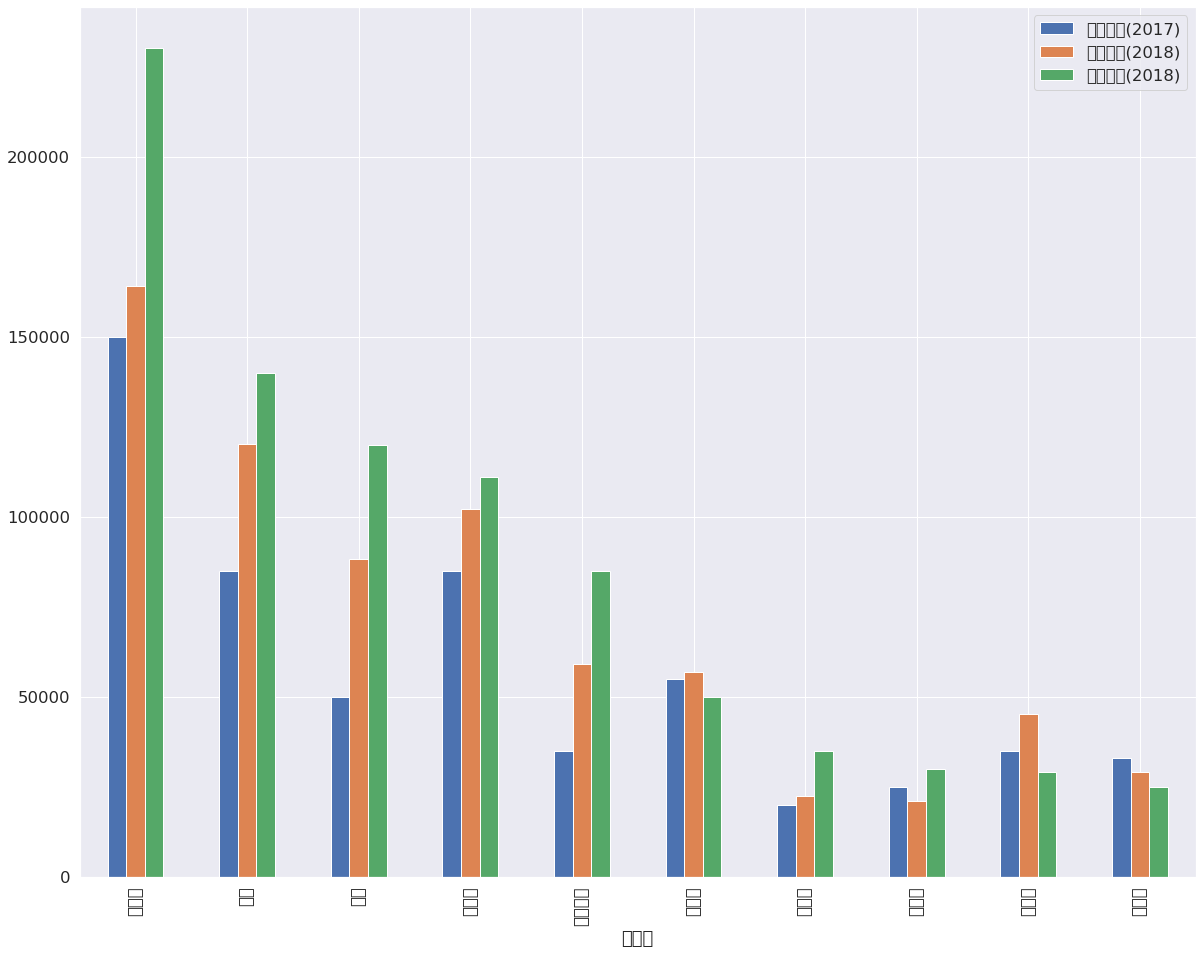

In [170]:
# 선수별 연볼 정보 (작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 그립ㄴ다. 
mpl.rc('font', family='나눔고딕')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)','실제연봉(2018)'], kind='bar')